# Task Description


In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because
it has only two variables.

<a href = "https://drive.google.com/file/d/1vFumlk_XZAGKDtUOByWn_Ph-U797tVkO/view?usp=sharing">Sample Dataset</a>- you can download a csv file of dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('StudentHoursScores.csv')
df

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12
5,8.9,87
6,2.5,21
7,1.9,19
8,2.7,29
9,8.3,81


In [8]:
df.shape

(23, 2)

In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [15]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [16]:
df.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


# grouping data 

In [17]:
X = df.iloc[:, :-1].values  #all rows and column except for the last one
X

array([[7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [2.7],
       [8.3],
       [5.5],
       [9.2],
       [1.5],
       [3.5],
       [8.5],
       [3.2],
       [6.5],
       [2.5],
       [9.6],
       [4.3],
       [4.1],
       [3. ],
       [2.6]])

In [18]:
Y = df.iloc[:, -1].values
Y

array([79, 60, 45, 33, 12, 87, 21, 19, 29, 81, 58, 88, 14, 34, 85, 32, 66,
       21, 96, 42, 40, 30, 25], dtype=int64)

In [20]:
X.ndim

2

In [21]:
Y.ndim

1

# Visualizing data

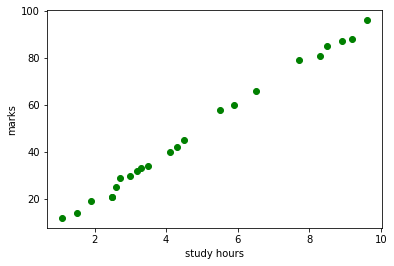

In [34]:
plt.scatter(X, Y, marker='o', color='g')
plt.xlabel('study hours')
plt.ylabel('marks')
plt.show()

# Splitting data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print()
print(X_test.shape)

(18, 1)

(5, 1)


# Creating model

In [36]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [38]:
model.coef_

array([10.06743716])

In [39]:
model.intercept_

-0.8015939692559186

# Prediction

In [40]:
y_train_pred = model.predict(X_train)
y_train_pred.shape

(18,)

In [41]:
y_test_pred = model.predict(X_test)
y_test_pred.shape

(5,)

In [44]:
model.predict([[5]])

array([49.53559183])

# Calculate accuracy

### Test accuracy

In [57]:
from sklearn.metrics import r2_score, mean_squared_error
print("accuracy is: ", r2_score(Y_test,y_test_pred))
print("mse", mean_squared_error(Y_test,y_test_pred))
vif = 1/1-(r2_score(Y_test,y_test_pred))
print("vif", vif)

accuracy is:  0.9900509060111312
mse 5.397980434600632
vif 0.009949093988868785


### Train accuracy

In [58]:
print("accuracy is: ", r2_score(Y_train,y_train_pred))
print("mse", mean_squared_error(Y_train,y_train_pred))

accuracy is:  0.9959881759446586
mse 2.77464685684299


# Drawing the best fit line

## Training data 

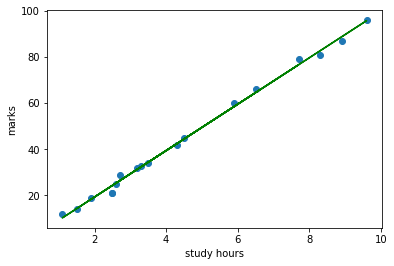

In [51]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_train_pred, color='g')
plt.xlabel('study hours')
plt.ylabel('marks')
plt.show()

## Test Data

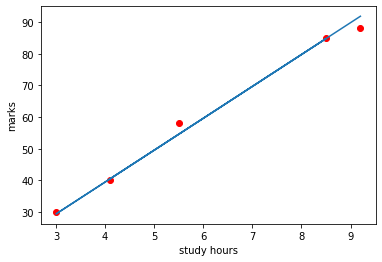

In [50]:
plt.scatter(X_test, Y_test, color='r')
plt.plot(X_test, y_test_pred)
plt.xlabel('study hours')
plt.ylabel('marks')
plt.show()